## Importing necessary library

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [426]:
df=pd.read_csv("./IMDb Movies India.csv",encoding="latin-1")

In [427]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [428]:
df.shape

(15509, 10)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [430]:
df.groupby("Genre").size()

Genre
Action                          1289
Action, Adventure                 41
Action, Adventure, Biography       1
Action, Adventure, Comedy         42
Action, Adventure, Crime          19
                                ... 
Thriller, Action                   2
Thriller, Musical, Mystery         1
Thriller, Mystery                  3
Thriller, Mystery, Family          1
War                                8
Length: 485, dtype: int64

In [431]:
df.groupby("Director").size()

Director
A B Arjun          1
A. Bhimsingh      18
A. Habib           1
A. Jagannathan     5
A. Karim           1
                  ..
Zoya Akhtar        7
Zubair Khan        2
Zubeida            2
Zul Vellani        1
Zunaid Memon       1
Length: 5938, dtype: int64

In [432]:
df.groupby("Year").size()

Year
(1913)      1
(1914)      1
(1915)      1
(1917)      1
(1922)      1
         ... 
(2018)    381
(2019)    410
(2020)    320
(2021)    392
(2022)     38
Length: 102, dtype: int64

## Data Cleaning

#### Identifying and handling duplicated values

In [433]:
df["Name"].duplicated().sum()

1671

##### we can ignore this because movies can have same name

In [434]:
df.duplicated().sum()

6

In [435]:
df=df.drop_duplicates()

#### Taking only necessary features from dataset

In [436]:
df.drop(columns=["Name","Duration","Votes"],axis=1,inplace=True)

In [437]:
df.head()

,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,NaN,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#### Identifying and Handling missing values

In [438]:
df.isnull().sum()

Year         527
Genre       1876
Rating      7584
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

##### handling Year column

In [439]:
df.dropna(subset=["Year"],inplace=True)

##### handling rating column

In [440]:
df["Rating"]=df["Rating"].replace(np.nan,np.mean(df["Rating"]))

##### handling director column

In [441]:
df.dropna(subset=["Director"],inplace=True)

##### hanndling Actor1 column

In [442]:
df.dropna(subset=["Actor 1"],inplace=True)

##### hanndling Actor2 column

In [443]:
df.dropna(subset=["Actor 2"],inplace=True)

##### hanndling Actor3 column

In [444]:
df.dropna(subset=["Actor 3"],inplace=True)

##### handling Genre column

In [445]:
## choosing genre by Director and Actor 1
df['Genre'] = df.groupby(['Director','Actor 1'])['Genre'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [446]:
## choosing genre by Director
df['Genre'] = df.groupby('Director')['Genre'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [447]:
## choosing genre by Actor 1
df['Genre'] = df.groupby('Actor 1')['Genre'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [448]:
df.dropna(subset=["Genre"],inplace=True)

In [449]:
df.isnull().sum()

Year        0
Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [450]:
df.shape

(11994, 7)

## Data Visualisation

In [451]:
df["Year"] = df.loc[:,"Year"].str.extract(r"(\d{4})")

In [452]:
df["Year"]=df["Year"].astype(int)

In [453]:
df = df.sort_values(by='Year')

In [454]:
df.head()

,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
8146,1917,"Adventure, Drama, Fantasy",6.700000,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
7253,1928,"Fantasy, History",5.841621,Anand Prasad Kapoor,Mehar Banu,Lobo,Ata Mohammed
7336,1928,"Action, Drama, History",5.841621,Vishnupant Govind Damle,Sheikh Fattelal,Keshavrao Dhaiber,Kamaladevi
11659,1930,"Action, Drama",5.841621,K.P. Bhave,Eddie Billimoria,Gohar,Mazhar Khan
3500,1931,Action,5.841621,Pesi Karani,Master Vithal,Jillo,Khalil


In [455]:
df['Genre'].value_counts()

Genre
Drama                            2487
Action                           1116
Drama, Romance                    521
Romance                           515
Drama, Family                     466
                                 ... 
Adventure, Biography, History       1
Action, Adventure, History          1
Fantasy, Horror, Romance            1
Fantasy, Musical, Drama             1
Horror, Musical, Thriller           1
Name: count, Length: 448, dtype: int64

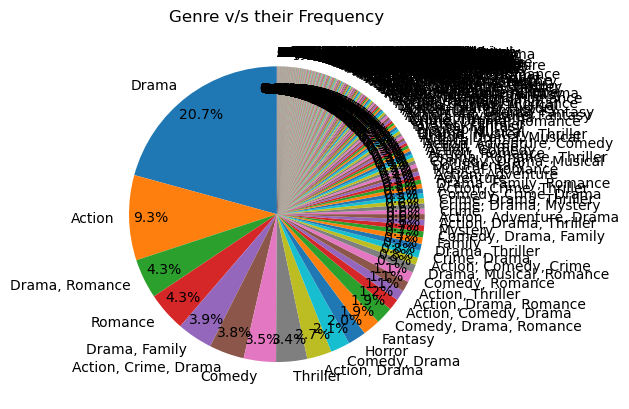

In [456]:
plt.pie(df["Genre"].value_counts(),labels=df["Genre"].value_counts().index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
plt.title("Genre v/s their Frequency")
plt.show()

##### considering only primary genre : taking first genre as primary genre

In [457]:
df["Main_genre"]=df.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [458]:
df.head()

,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,Main_genre
8146,1917,"Adventure, Drama, Fantasy",6.700000,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke,Adventure
7253,1928,"Fantasy, History",5.841621,Anand Prasad Kapoor,Mehar Banu,Lobo,Ata Mohammed,Fantasy
7336,1928,"Action, Drama, History",5.841621,Vishnupant Govind Damle,Sheikh Fattelal,Keshavrao Dhaiber,Kamaladevi,Action
11659,1930,"Action, Drama",5.841621,K.P. Bhave,Eddie Billimoria,Gohar,Mazhar Khan,Action
3500,1931,Action,5.841621,Pesi Karani,Master Vithal,Jillo,Khalil,Action


In [459]:
df["Main_genre"].value_counts()

Main_genre
Drama          4244
Action         3322
Comedy         1455
Romance         566
Crime           448
Thriller        414
Horror          310
Adventure       266
Fantasy         258
Musical         145
Biography       129
Mystery         129
Family          128
Documentary      83
Animation        54
History          19
Sci               7
Music             7
Sport             5
War               4
Reality           1
Name: count, dtype: int64

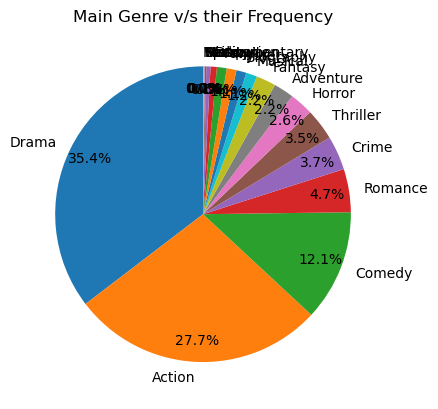

In [460]:
plt.pie(df["Main_genre"].value_counts(),labels=df["Main_genre"].value_counts().index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
plt.title("Main Genre v/s their Frequency")
plt.show()

##### Plotting 10 most frequent director with their average mean ratings

In [461]:
df["mean_ratings_director"]=df.groupby(["Director"])["Rating"].transform("mean")

In [462]:
temp=df.groupby("Director").agg({"mean_ratings_director":"max"})

In [463]:
temp

,mean_ratings_director
Director,
A B Arjun,5.841621
A. Bhimsingh,6.724535
A. Habib,5.841621
A. Jagannathan,5.835405
A. Karim,5.841621
...,...
Ziaullah Khan,5.720811
Zoya Akhtar,6.800000
Zubair Khan,6.900000


In [464]:
X=df["Director"].value_counts().index[:10]

In [465]:
Y=[]
for i in X:
    for j in range(len(temp.index)):
        if i==temp.index[j]:
            Y.append(temp["mean_ratings_director"][j])

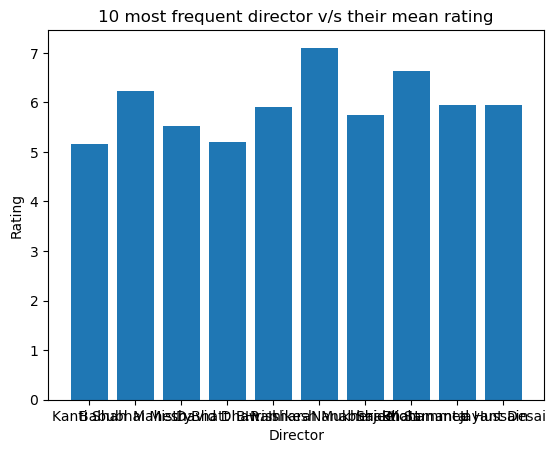

In [466]:
plt.bar(X,Y)
plt.title("10 most frequent director v/s their mean rating")
plt.xlabel("Director")
plt.ylabel("Rating")
plt.show()

## Ml Model

#### Data Transformation

In [467]:
df.columns

Index(['Year', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'Main_genre', 'mean_ratings_director'],
      dtype='object')

In [468]:
df.drop(columns=["Main_genre","mean_ratings_director"],inplace=True)

#### Converting categorical data to numerical data

In [469]:
from sklearn.preprocessing import LabelEncoder

In [470]:
encoder=LabelEncoder()

In [471]:
df["Genre"]=encoder.fit_transform(df["Genre"])
df["Director"]=encoder.fit_transform(df["Director"])
df["Actor 1"]=encoder.fit_transform(df["Actor 1"])
df["Actor 2"]=encoder.fit_transform(df["Actor 2"])
df["Actor 3"]=encoder.fit_transform(df["Actor 3"])

In [472]:
df.head()

,Year,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
8146,1917,109,6.700000,1058,393,1113,877
7253,1928,360,5.841621,335,1978,1844,586
7336,1928,45,5.841621,4565,3206,1670,1643
11659,1930,39,5.841621,1745,1058,1164,2137
3500,1931,0,5.841621,2711,1944,1478,1750


#### Scaling Dataset

In [473]:
from sklearn.preprocessing import RobustScaler

In [474]:
scaler=RobustScaler()

In [475]:
X=df.drop("Rating",axis=1)
Y=df["Rating"]

In [476]:
X.loc[:,:]=scaler.fit_transform(X_scaled.loc[:,:])

In [477]:
X

,Year,Genre,Director,Actor 1,Actor 2,Actor 3
8146,-2.000000,-0.380228,-0.592204,-0.823423,0.398196,0.371206
7253,-1.710526,-0.380228,-0.833827,0.938728,-0.007594,0.506571
7336,-1.710526,0.000000,0.203784,0.563340,-0.137162,-0.305152
11659,-1.631579,0.140684,0.138591,-0.185884,-0.664452,0.934992
3500,-1.631579,0.000000,0.033280,-0.164685,0.068818,0.131178
...,...,...,...,...,...,...
5084,0.763158,0.053232,-0.080693,0.982678,0.805411,-0.484708
1537,0.763158,0.646388,-0.684750,0.352896,0.518747,0.591232
14360,0.763158,0.387833,0.278550,-0.270683,-0.868533,-0.537737
9042,0.763158,0.376426,0.388420,0.859100,0.490271,-0.846145


#### Regression result

In [478]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [479]:
def model_accuracy(X_train,Y_train,Y_test,Y_pred,model,model_name):
    cvs=cross_val_score(model,X_train,Y_train,cv=10)
    print("Cross Validation Score :",cvs)
    print("Average Cross Validation Score :",cvs.mean())
    print(f"Mean Absolute Error for {model_name} :",mean_absolute_error(Y_test,Y_pred))
    print(f"Mean Squared Error for {model_name} :",mean_squared_error(Y_test,Y_pred))
    print(f"R2 Score for {model_name} :",r2_score(Y_test,Y_pred))

#### Train test split

In [480]:
from sklearn.model_selection import train_test_split

In [481]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=45)

#### ML Models

In [482]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### 1. Linear Regression

In [483]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [484]:
Y_pred=lr.predict(X_test)

In [485]:
model_accuracy(X_train,Y_train,Y_test,Y_pred,lr,"Linear Regression")

Cross Validation Score : [-0.00332318  0.02293398  0.03241009  0.00687624  0.02451591  0.01674321
  0.03056389  0.0228647   0.00962788  0.00795896]
Average Cross Validation Score : 0.017117170079652976
Mean Absolute Error for Linear Regression : 0.7549778885317788
Mean Squared Error for Linear Regression : 1.1752666171892145
R2 Score for Linear Regression : 0.01648191927887377


#### 2. Decision Tree

In [486]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [487]:
Y_pred=dt.predict(X_test)

In [488]:
model_accuracy(X_train,Y_train,Y_test,Y_pred,dt,"Decision Tree")

Cross Validation Score : [-1.06104159 -0.98936126 -1.02295008 -0.84084048 -0.95700897 -1.01590751
 -0.92852081 -1.03962828 -1.13053177 -1.03934854]
Average Cross Validation Score : -1.002513929690601
Mean Absolute Error for Decision Tree : 1.1078290449069115
Mean Squared Error for Decision Tree : 2.317574612997956
R2 Score for Decision Tree : -0.9394548453653415


#### 3. Random Forest

In [489]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [490]:
Y_pred=rf.predict(X_test)

In [491]:
model_accuracy(X_train,Y_train,Y_test,Y_pred,rf,"Random Forest")

Cross Validation Score : [-0.01839695  0.05276542  0.04847288  0.01537613  0.00334706  0.05476177
  0.04347673  0.04458391 -0.02405015  0.00944205]
Average Cross Validation Score : 0.022977885320803228
Mean Absolute Error for Random Forest : 0.7848110001808215
Mean Squared Error for Random Forest : 1.146672802622619
R2 Score for Random Forest : 0.040410560841323995


#### 4. XgBoost

In [492]:
xg=XGBRegressor(n_estimators=50,objective ='reg:squarederror',gamma=0.09,learning_rate=0.08,subsample=0.7)
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [493]:
Y_pred=xg.predict(X_test)

In [494]:
model_accuracy(X_train,Y_train,Y_test,Y_pred,xg,"XgBoost")

Cross Validation Score : [0.03119736 0.07028257 0.09211238 0.04605352 0.05455431 0.08689013
 0.07998807 0.06789456 0.02095953 0.06135044]
Average Cross Validation Score : 0.061128286580566425
Mean Absolute Error for XgBoost : 0.7674557079765908
Mean Squared Error for XgBoost : 1.1148355745454064
R2 Score for XgBoost : 0.06705344254664147


#### From above model Xg Boost model performs best with a r2 score of 0.067 so we will continue with XgBoost

### Hyper Parameter tuning for XgBoost

In [495]:
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 500]
}

In [496]:
from sklearn.model_selection import GridSearchCV

In [497]:
grid=GridSearchCV(estimator=xg,param_grid=params,n_jobs=-1,verbose=2,cv=10,scoring="neg_mean_squared_error")

In [498]:
grid.fit(X_train,Y_train)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0.09,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.08,...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=50,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [499]:
best_params = grid.best_params_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 1.0}

In [500]:
model=XGBRegressor(colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8)

In [501]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [502]:
Y_pred=model.predict(X_test)

In [503]:
model_accuracy(X_train,Y_train,Y_test,Y_pred,model,"XgBoost Regressor")

Cross Validation Score : [0.02989946 0.08078362 0.09102518 0.05022549 0.05561361 0.07730885
 0.07868738 0.0638058  0.03040886 0.05318343]
Average Cross Validation Score : 0.061094168152545335
Mean Absolute Error for XgBoost Regressor : 0.7602085338687444
Mean Squared Error for XgBoost Regressor : 1.1056251747936445
R2 Score for XgBoost Regressor : 0.07476113589386812


### We see that after Hyper Parameter tuning R2 score improves slightly. Final R2 Score is 0.074